# NNL:
The best model for predicting new deaths was deep neural network with three hidden layers and 3x neurons. the mean_squared error is :0.1482 and the r2_score is:0.92

# RandomForestRegressor:
the mean_squared error is :0.05529 and the r2_score is:0.910

# SVR:
The best model was with linear kernel. the mean_squared error is :8633.4 and the r2_score is:0.56

In [1]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np

# For visualisation 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Dependencies for preprocessing data for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

# Dependencies for nueural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Dependencies for SVR model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# imports for database connection
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select


C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages

In [2]:
engine = create_engine("sqlite:///../Resources/covid_db.db")

In [3]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [6]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [7]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [8]:
# View table column headers & rows - covid_stats
covid_stats_table = select('*').select_from(covid_stats)
covid_stats_result = session.execute(covid_stats_table).fetchall()
# print(covid_stats.__table__.columns.keys())
# print(covid_stats_result)

In [9]:
# View table column headers & rows - government_regulation
government_regulation_table = select('*').select_from(government_regulation)
government_regulation_result = session.execute(government_regulation_table).fetchall()
# print(government_regulation.__table__.columns.keys())
# print(government_regulation_result)

In [10]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [11]:
# preview 
df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


In [12]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

primary_key_reaction                     object
date_updated                             object
iso_code                                 object
continent                                object
location                                 object
population                                int64
population_density                      float64
median_age                              float64
new_cases                                 int64
percentage_of_Pop_New_Cases             float64
new_deaths                                int64
percentage_of_Pop_New_Deaths            float64
new_tests                                 int64
percentage_of_Pop_New_Tests             float64
total_cases_updated                       int64
percentage_of_Pop_Total_Cases           float64
total_deaths_updated                      int64
percentage_of_Pop_Total_Deaths          float64
total_tests_updated                       int64
percentage_of_Pop_Total_Tests           float64
primary_key_response                    

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0


In [13]:
# check merged df for null values.
df.describe()

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
count,3.227700e+04,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,3.227700e+04,3.227700e+04,32277.000000,3.227700e+04,...,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000
mean,5.400962e+07,214.197672,31.332131,778.920656,0.001991,26.154042,5.072572e-07,8.487867e+03,0.024842,4.745188e+04,...,1.928935,58.044062,1.119343,64.012734,55.398830,1.086273,58.043087,1.037969,40.854943,0.176124
std,1.764115e+08,728.593605,9.175007,4360.424882,0.005546,138.626066,2.001007e-06,5.284508e+04,0.074306,2.709722e+05,...,5.493011,28.321004,20.384550,28.648400,24.321508,14.496031,25.638560,15.068222,32.776192,8.648105
min,9.834000e+04,1.980000,15.100000,-2461.000000,-0.221254,-1918.000000,-6.790114e-05,-3.743000e+03,-0.039824,0.000000e+00,...,0.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,0.000000,-100.000000,0.000000,-100.000000
25%,4.822233e+06,32.333000,23.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,7.200000e+01,...,0.000000,39.810000,0.000000,50.000000,44.870000,0.000000,44.700000,0.000000,0.000000,0.000000
50%,1.132662e+07,82.805000,31.100000,18.000000,0.000182,0.000000,0.000000e+00,0.000000e+00,0.000000,1.331000e+03,...,0.000000,65.740000,0.000000,72.620000,62.180000,0.000000,65.150000,0.000000,50.000000,0.000000
75%,3.892834e+07,204.430000,39.800000,221.000000,0.001469,4.000000,2.433856e-07,1.911000e+03,0.013440,1.297400e+04,...,0.968671,80.560000,0.000000,85.710000,73.720000,0.000000,77.270000,0.000000,75.000000,0.000000
max,1.439324e+09,7915.731000,48.200000,78761.000000,0.189258,4928.000000,1.193442e-04,1.194086e+06,1.657412,5.997163e+06,...,70.895970,100.000000,1965.107914,100.000000,96.150000,655.459272,100.000000,655.425220,100.000000,400.000000


In [14]:
df.columns

Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

In [15]:
# Encode the date column to int
le = LabelEncoder()
df['date_updated'] = le.fit_transform(df['date_updated'])
print(df.dtypes)



primary_key_reaction                     object
date_updated                              int32
iso_code                                 object
continent                                object
location                                 object
population                                int64
population_density                      float64
median_age                              float64
new_cases                                 int64
percentage_of_Pop_New_Cases             float64
new_deaths                                int64
percentage_of_Pop_New_Deaths            float64
new_tests                                 int64
percentage_of_Pop_New_Tests             float64
total_cases_updated                       int64
percentage_of_Pop_Total_Cases           float64
total_deaths_updated                      int64
percentage_of_Pop_Total_Deaths          float64
total_tests_updated                       int64
percentage_of_Pop_Total_Tests           float64
primary_key_response                    

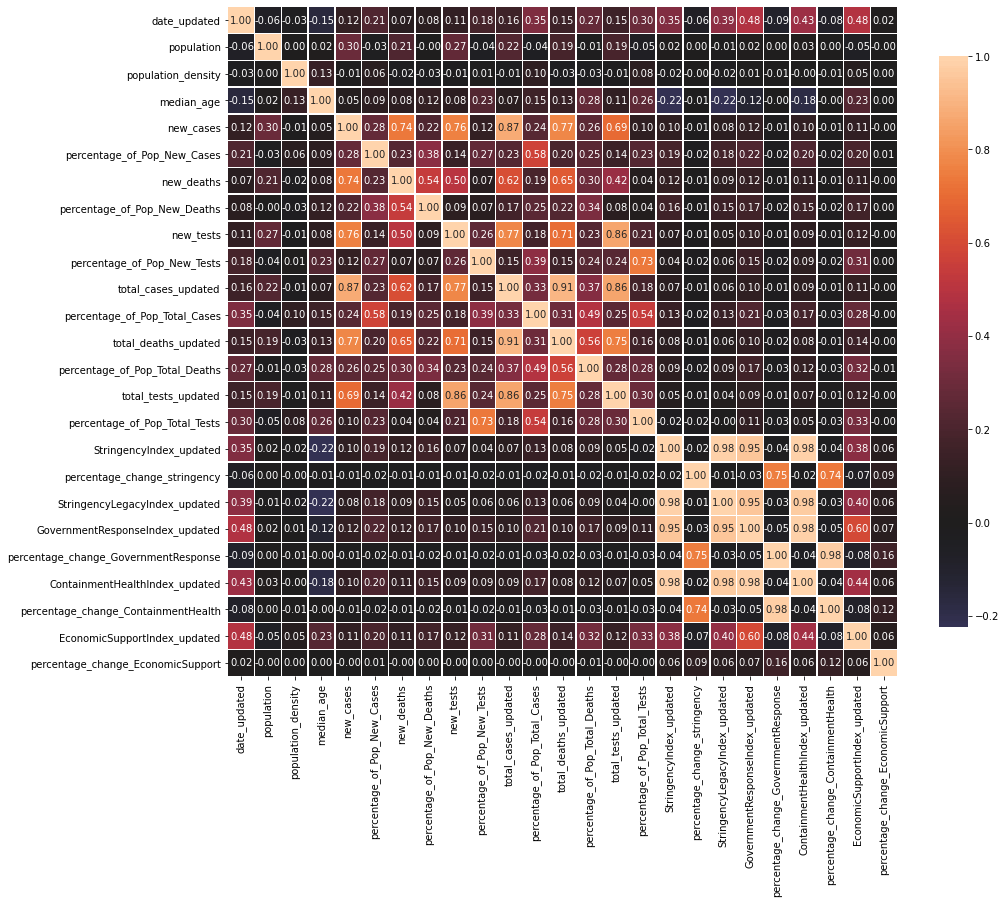

In [16]:
# Checking correlation for feature selection.

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

## DF New Deaths

In [17]:
# Create a df to test impact of some features on 'new deaths'
# adding economic support index to the mdel made the accuracy to drop.
df_new_deaths=df[['date_updated','population','population_density','median_age','new_cases','StringencyIndex_updated','new_deaths']]
df_new_deaths

,date_updated,population,population_density,median_age,new_cases,StringencyIndex_updated,new_deaths
0,72,106766,584.800,41.2,2,0.00,0
1,78,106766,584.800,41.2,0,33.33,0
2,79,106766,584.800,41.2,2,33.33,0
3,80,106766,584.800,41.2,0,44.44,0
4,81,106766,584.800,41.2,0,44.44,0
...,...,...,...,...,...,...,...
32272,239,14862927,42.729,19.6,55,80.56,13
32273,240,14862927,42.729,19.6,41,80.56,10
32274,241,14862927,42.729,19.6,96,80.56,6
32275,242,14862927,42.729,19.6,18,80.56,1


In [18]:
# Check types
df_new_deaths.dtypes

date_updated                 int32
population                   int64
population_density         float64
median_age                 float64
new_cases                    int64
StringencyIndex_updated    float64
new_deaths                   int64
dtype: object

In [19]:
# Check stats
df_new_deaths.describe()

,date_updated,population,population_density,median_age,new_cases,StringencyIndex_updated,new_deaths
count,32277.00000,3.227700e+04,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000
mean,141.07572,5.400962e+07,214.197672,31.332131,778.920656,58.044062,26.154042
std,62.97139,1.764115e+08,728.593605,9.175007,4360.424882,28.321004,138.626066
min,0.00000,9.834000e+04,1.980000,15.100000,-2461.000000,0.000000,-1918.000000
25%,95.00000,4.822233e+06,32.333000,23.500000,0.000000,39.810000,0.000000
50%,145.00000,1.132662e+07,82.805000,31.100000,18.000000,65.740000,0.000000
75%,194.00000,3.892834e+07,204.430000,39.800000,221.000000,80.560000,4.000000
max,243.00000,1.439324e+09,7915.731000,48.200000,78761.000000,100.000000,4928.000000


In [20]:
# Drop rows with null values
df_new_deaths=df_new_deaths.dropna(how='any')
df_new_deaths.shape

(32277, 7)

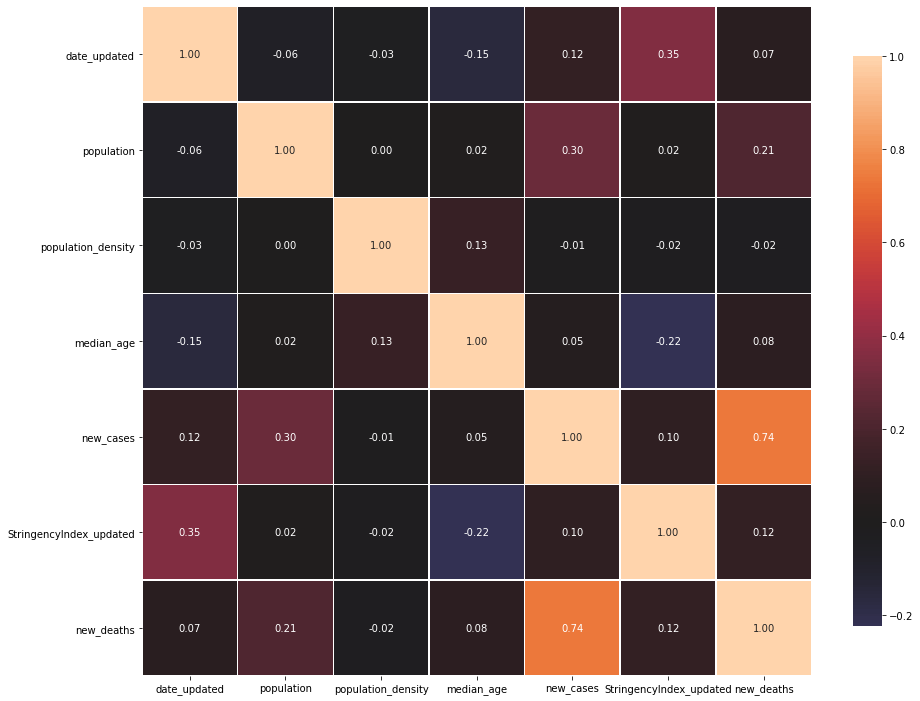

In [21]:
correlation_heatmap(df_new_deaths)

# SVR MODEL

In [22]:
# create features(X) and target(y) sets
X = df_new_deaths.drop(['new_deaths'],axis=1).values

y =df_new_deaths['new_deaths'].values
y = y.reshape(-1,1)

In [23]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
scaler=StandardScaler()

In [24]:
# check number of samples (n_samples)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

30663
1614
30663
1614


In [25]:
# create SVR model
n_samples, n_features = 30663, len(df_new_deaths.columns)-1
rng = np.random.RandomState(5)
# y_train = rng.randn(n_samples)
# X_train = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))
regr.fit(X_train, y_train)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [26]:
# make predictions using test data
y_pred = regr.predict(X_test)

# return R-squared for the prediction
regr.score(X_test, y_test)

0.13243431029537123

In [27]:
# create SVR model
n_samples, n_features = 30663,len(df_new_deaths.columns)-1
rng = np.random.RandomState(5)
# y_train = rng.randn(n_samples)
# X_train = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.1))
regr.fit(X_train, y_train)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

In [28]:
# make predictions using test data
y_pred = regr.predict(X_test)

# return R-squared for the prediction
regr.score(X_test, y_test)

0.37734332835756723

In [29]:
mse=mean_squared_error(y_test,y_pred)
mse

18443.2323067835

In [30]:
# create SVR model
n_samples, n_features = 30663, len(df_new_deaths.columns)-1
rng = np.random.RandomState(5)
# y_train = rng.randn(n_samples)
# X_train = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=3, gamma='scale', coef0=0.0, C=1.0, epsilon=0.1))
regr.fit(X_train, y_train)

# make predictions using test data
# n_samples = 9, n_features = 6
y_pred = regr.predict(X_test)

# return R-squared for the prediction
regr.score(X_test, y_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.29974781726041233

In [31]:
# create SVR model
n_samples, n_features = 30663, len(df_new_deaths.columns)-1
rng = np.random.RandomState(5)

regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', gamma='scale', coef0=0.0, C=1.0, epsilon=0.1))
regr.fit(X_train, y_train)

# make predictions using test data

y_pred = regr.predict(X_test)

# return R-squared for the prediction
regr.score(X_test, y_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-2.8554393326623004

## Predicting Number of New Deaths- with RandomForestRegressor


In [32]:
# create features(X) and target(y) sets
X = df_new_deaths.drop(['new_deaths'],axis=1).values

y = df_new_deaths['new_deaths'].values
y = y.reshape(-1,1)

In [33]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.10168 and the r2_score is:0.919
------------------------------------
Feature: 0, Score: 0.13234
Feature: 1, Score: 0.01940
Feature: 2, Score: 0.02700
Feature: 3, Score: 0.03247
Feature: 4, Score: 0.75266
Feature: 5, Score: 0.03613
--------------------------------------


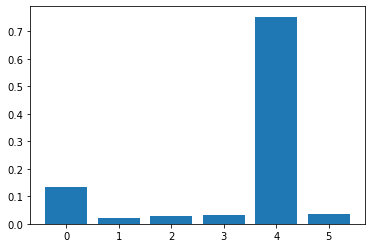

In [34]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# labels=['date_updated','population','population_density','median_age','new_cases','StringencyIndex_updated']
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
# plt.xticks(range(len(importance)),labels, rotation='vertical')
plt.show()

## Predicting Number of New Deaths- with NN Model


In [ ]:
# create features(X) and target(y) sets
X = df_new_deaths.drop(['new_deaths'],axis=1).values

y = df_new_deaths['new_deaths'].values
y = y.reshape(-1,1)

In [ ]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
len(df_new_deaths.columns)

In [ ]:
# define model - shallow neural net
number_hidden_nodes = 12
number_input_features =6

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

## Deep Neural Network

In [ ]:
# Define the model - deep neural net
number_input_features = 6
hidden_nodes_layer1 = 18
hidden_nodes_layer2 =9

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=200)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [ ]:
# Define the model - deep neural net with 3 hidden layers
number_input_features = len(df_new_deaths.columns)-1
hidden_nodes_layer1 = (len(df_new_deaths.columns)-1)*3
hidden_nodes_layer2 =round(((len(df_new_deaths.columns)-1)*3)/2)
hidden_nodes_layer3 =round((((len(df_new_deaths.columns)-1)*3)/2)/2)

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=200)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 3 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

In [ ]:
# Print y_train and y_test predicted[0]
print(y_train_pred)
print(y_test_pred)

In [ ]:
# Convert the scaled predictions to actual values.
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))